In [ ]:
# 📊 Continuous Celery Task Execution for PostgreSQL

"""
This script runs **millions of tasks** on a Celery worker backed by PostgreSQL to analyze:
- **How PostgreSQL handles a high number of tasks**
- **Why task creation slows down over time**
- **Database performance factors like indexing, transactions, and query overhead**

### **Setup**
- Ensure Celery PostgreSQL worker is running.
- Modify connection settings if necessary.
"""

import time
import psycopg2
from celery import Celery

# PostgreSQL Connection Details
PG_HOST = "localhost"
PG_PORT = 5433
PG_USER = "celery_user"
PG_PASSWORD = "celery_pass"
PG_DATABASE = "celery_db"

# Celery client using PostgreSQL
celery_pg = Celery(
    "tasks",
    broker=f"sqla+postgresql://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}",
    backend=f"db+postgresql://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}"
)

# Function to continuously create tasks
def create_pg_tasks(task_count=1000000):
    """
    Submits tasks continuously to PostgreSQL-backed Celery.
    Helps analyze why PostgreSQL gets slower as task count increases.
    """
    start_time = time.time()
    for i in range(task_count):
        try:
            celery_pg.send_task("tasks.simulate_heavy_task", args=[f"Task {i}"])
            if i % 10000 == 0:
                print(f"🔹 Submitted {i} tasks...")
        except Exception as e:
            print(f"[❌] Task creation failed: {e}")
    elapsed_time = time.time() - start_time
    print(f"✅ Completed submitting {task_count} tasks in {elapsed_time:.2f} seconds")

# Start creating tasks
create_pg_tasks()


# Check PostgreSQL Celery Task Metadata Table
def check_pg_task_table():
    """
    Connects to PostgreSQL and retrieves statistics from the Celery task table.
    """
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        user=PG_USER,
        password=PG_PASSWORD,
        dbname=PG_DATABASE
    )
    cur = conn.cursor()

    # Count number of tasks stored
    cur.execute("SELECT COUNT(*) FROM celery_taskmeta;")
    task_count = cur.fetchone()[0]
    print(f"📊 Total Tasks in PostgreSQL Celery Table: {task_count}")

    # Get latest task entries
    cur.execute("SELECT task_id, status, date_done FROM celery_taskmeta ORDER BY date_done DESC LIMIT 10;")
    rows = cur.fetchall()
    for row in rows:
        print(row)

    conn.close()

# Check PostgreSQL task metadata table
check_pg_task_table()


[❌] Task creation failed: (psycopg2.OperationalError) connection to server at "localhost" (127.0.0.1), port 5432 failed: FATAL:  password authentication failed for user "celery_user"

(Background on this error at: https://sqlalche.me/e/20/e3q8)
[❌] Task creation failed: (psycopg2.OperationalError) connection to server at "localhost" (127.0.0.1), port 5432 failed: FATAL:  password authentication failed for user "celery_user"

(Background on this error at: https://sqlalche.me/e/20/e3q8)
[❌] Task creation failed: (psycopg2.OperationalError) connection to server at "localhost" (127.0.0.1), port 5432 failed: FATAL:  password authentication failed for user "celery_user"

(Background on this error at: https://sqlalche.me/e/20/e3q8)
[❌] Task creation failed: (psycopg2.OperationalError) connection to server at "localhost" (127.0.0.1), port 5432 failed: FATAL:  password authentication failed for user "celery_user"

(Background on this error at: https://sqlalche.me/e/20/e3q8)
[❌] Task creation fa

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
print(f"Numpy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")


In [ ]:
!pip uninstall -y matplotlib
!pip install --no-cache-dir matplotlib


In [ ]:
%pip install numpy --upgrade

import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.show()


In [ ]:
!pip install matplotlib==3.6.3


In [ ]:
pip install "numpy<2"


In [2]:
pip install sqlalchemy


  Using cached SQLAlchemy-2.0.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
  Using cached greenlet-3.1.1-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (3.8 kB)
Using cached SQLAlchemy-2.0.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Using cached greenlet-3.1.1-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (599 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install psycopg2


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp310-cp310-linux_x86_64.whl size=499395 sha256=f49b7b7db54d9ac7bc7f5cc922608c137b10b067360f61c47fd61a785f4f600c
  Stored in directory: /home/minte/.cache/pip/wheels/51/41/e0/2912ad51b01f454d26dfb26e5cc5923874656749b9e83943a8
Successfully built psycopg2
Note: you may need to restart the kernel to use updated packages.


In [5]:
import psycopg2

# PostgreSQL Connection Details
pg_host = "localhost"  # Change if needed
pg_port = "5433"       # Default PostgreSQL port
pg_user = "celery_user"
pg_password = "celery_pass"
pg_database = "celery_db"

try:
    conn = psycopg2.connect(
        host=pg_host,
        port=pg_port,
        user=pg_user,
        password=pg_password,
        dbname=pg_database
    )
    print("[SUCCESS] PostgreSQL is reachable!")
    conn.close()
except Exception as e:
    print(f"[ERROR] Unable to connect to PostgreSQL: {e}")


[SUCCESS] PostgreSQL is reachable!


[INFO] PostgreSQL is running and accessible.
[INFO] Redis is running and accessible.

[INFO] Running benchmark for 10 tasks on PostgreSQL backend...
[INFO] Running benchmark for 10 tasks on Redis backend...
[ERROR] Failed to connect to Flower API: 404 Client Error: Not Found for url: http://localhost:5556/api/queues

[INFO] Running benchmark for 100 tasks on PostgreSQL backend...
[INFO] Running benchmark for 100 tasks on Redis backend...
[ERROR] Failed to connect to Flower API: 404 Client Error: Not Found for url: http://localhost:5556/api/queues

[INFO] Running benchmark for 500 tasks on PostgreSQL backend...
[INFO] Running benchmark for 500 tasks on Redis backend...
[ERROR] Failed to connect to Flower API: 404 Client Error: Not Found for url: http://localhost:5556/api/queues

[INFO] Running benchmark for 1000 tasks on PostgreSQL backend...
[INFO] Running benchmark for 1000 tasks on Redis backend...
[ERROR] Failed to connect to Flower API: 404 Client Error: Not Found for url: http://l

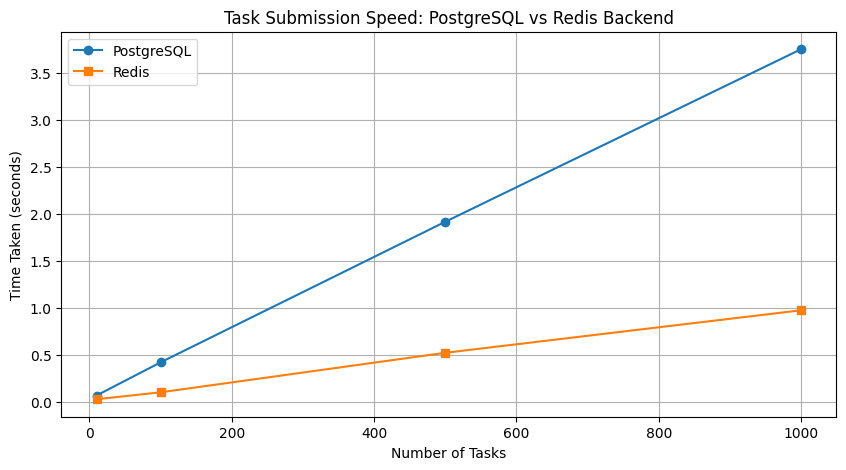


Benchmark Results:
   Task Count  PostgreSQL Backend (s)  Redis Backend (s)
0          10                0.065790           0.026222
1         100                0.419096           0.099861
2         500                1.917343           0.521100
3        1000                3.756736           0.974117


In [12]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from celery import Celery
import requests
import redis
import psycopg2

# PostgreSQL & Redis Connection Details
PG_HOST = "localhost"
PG_PORT = 5433
PG_USER = "celery_user"
PG_PASSWORD = "celery_pass"
PG_DATABASE = "celery_db"

# Redis Connection Details (Updated)
REDIS_HOST = "192.168.96.3"  # Your Redis server's IP
REDIS_PORT = 6379            # External mapped port
REDIS_DB = 0                 # Default database


# Celery Clients for PostgreSQL & Redis
celery_pg = Celery(
    "tasks",
    broker=f"sqla+postgresql://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}",
    backend=f"db+postgresql://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}"
)

celery_redis = Celery(
    "tasks",
    broker=f"redis://{REDIS_HOST}:{REDIS_PORT}/0",
    backend=f"redis://{REDIS_HOST}:{REDIS_PORT}/0"
)

# Check if PostgreSQL is reachable
def check_postgresql():
    try:
        conn = psycopg2.connect(
            host=PG_HOST,
            port=PG_PORT,
            user=PG_USER,
            password=PG_PASSWORD,
            dbname=PG_DATABASE
        )
        conn.close()
        print("[INFO] PostgreSQL is running and accessible.")
        return True
    except Exception as e:
        print(f"[ERROR] PostgreSQL connection failed: {e}")
        return False

# Check if Redis is reachable
def check_redis():
    try:
        client = redis.StrictRedis(host=REDIS_HOST, port=REDIS_PORT, db=REDIS_DB, decode_responses=True)
        client.ping()
        print("[INFO] Redis is running and accessible.")
        return True
    except Exception as e:
        print(f"[ERROR] Redis connection failed: {e}")
        return False

# Monitor Celery queue size via Flower API
def get_celery_queue_size():
    flower_api = "http://localhost:5556/api/queues"
    try:
        response = requests.get(flower_api, timeout=5)
        response.raise_for_status()  # Raise exception for HTTP errors (4xx, 5xx)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"[ERROR] Failed to connect to Flower API: {e}")
        return None

# Benchmark Task Submission for Celery Backend
def benchmark_task_submission(celery_client, task_count, retries=3):
    start_time = time.time()
    for _ in range(task_count):
        for attempt in range(retries):
            try:
                celery_client.send_task("tasks.simulate_heavy_task", args=["Benchmark Task"])
                break  # Success, exit retry loop
            except Exception as e:
                if attempt < retries - 1:
                    print(f"[WARNING] Task submission failed (Attempt {attempt+1}/{retries}): {e}. Retrying...")
                    time.sleep(0.1)
                else:
                    print(f"[ERROR] Task submission failed after {retries} attempts: {e}")
    return time.time() - start_time

# Run benchmark only if PostgreSQL and Redis are accessible
if check_postgresql() and check_redis():
    task_sizes = [10, 100, 500, 1000]
    pg_times = []
    redis_times = []

    for task_count in task_sizes:
        print(f"\n[INFO] Running benchmark for {task_count} tasks on PostgreSQL backend...")
        pg_time = benchmark_task_submission(celery_pg, task_count)
        pg_times.append(pg_time)

        print(f"[INFO] Running benchmark for {task_count} tasks on Redis backend...")
        redis_time = benchmark_task_submission(celery_redis, task_count)
        redis_times.append(redis_time)

        queue_status = get_celery_queue_size()
        if queue_status:
            print(f"[INFO] Celery Queue Status: {queue_status}")

    # Store results in a DataFrame
    results_df = pd.DataFrame({
        "Task Count": task_sizes,
        "PostgreSQL Backend (s)": pg_times,
        "Redis Backend (s)": redis_times
    })

    # Visualizing results
    plt.figure(figsize=(10, 5))
    plt.plot(results_df["Task Count"], results_df["PostgreSQL Backend (s)"], marker='o', label="PostgreSQL")
    plt.plot(results_df["Task Count"], results_df["Redis Backend (s)"], marker='s', label="Redis")
    plt.xlabel("Number of Tasks")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Task Submission Speed: PostgreSQL vs Redis Backend")
    plt.legend()
    plt.grid()
    plt.show()

    # Display Results
    print("\nBenchmark Results:")
    print(results_df)
else:
    print("[ERROR] PostgreSQL or Redis is not accessible. Benchmark aborted.")
